In [296]:
from sklearn import cluster, datasets, metrics, manifold, decomposition 
from matplotlib import pyplot as plt
from scipy.stats import mode
from time import time
import numpy as np
import seaborn as sns; sns.set()

# **Dataset: Digits**

In [297]:
data = datasets.load_digits()
kmean = cluster.KMeans(n_clusters=10, max_iter=200)
clusters = kmean.fit_predict(data.data)
centers = kmean.cluster_centers_.reshape(10, 64)

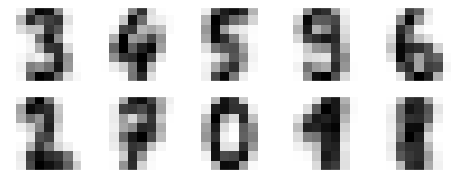

In [298]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmean.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [299]:
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(data.target[mask])[0]
metrics.accuracy_score(data.target, labels)

0.7935447968836951

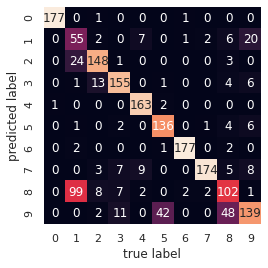

In [300]:
mat = metrics.confusion_matrix(data.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [301]:
x = []
y = []
for z in data.data:
  a = 0
  b = 0
  for i in range(0, 32):
    a = a + z[i]
  for i in range(32, len(z)):
    b = b + z[i]
  x.append(a)
  y.append(b)

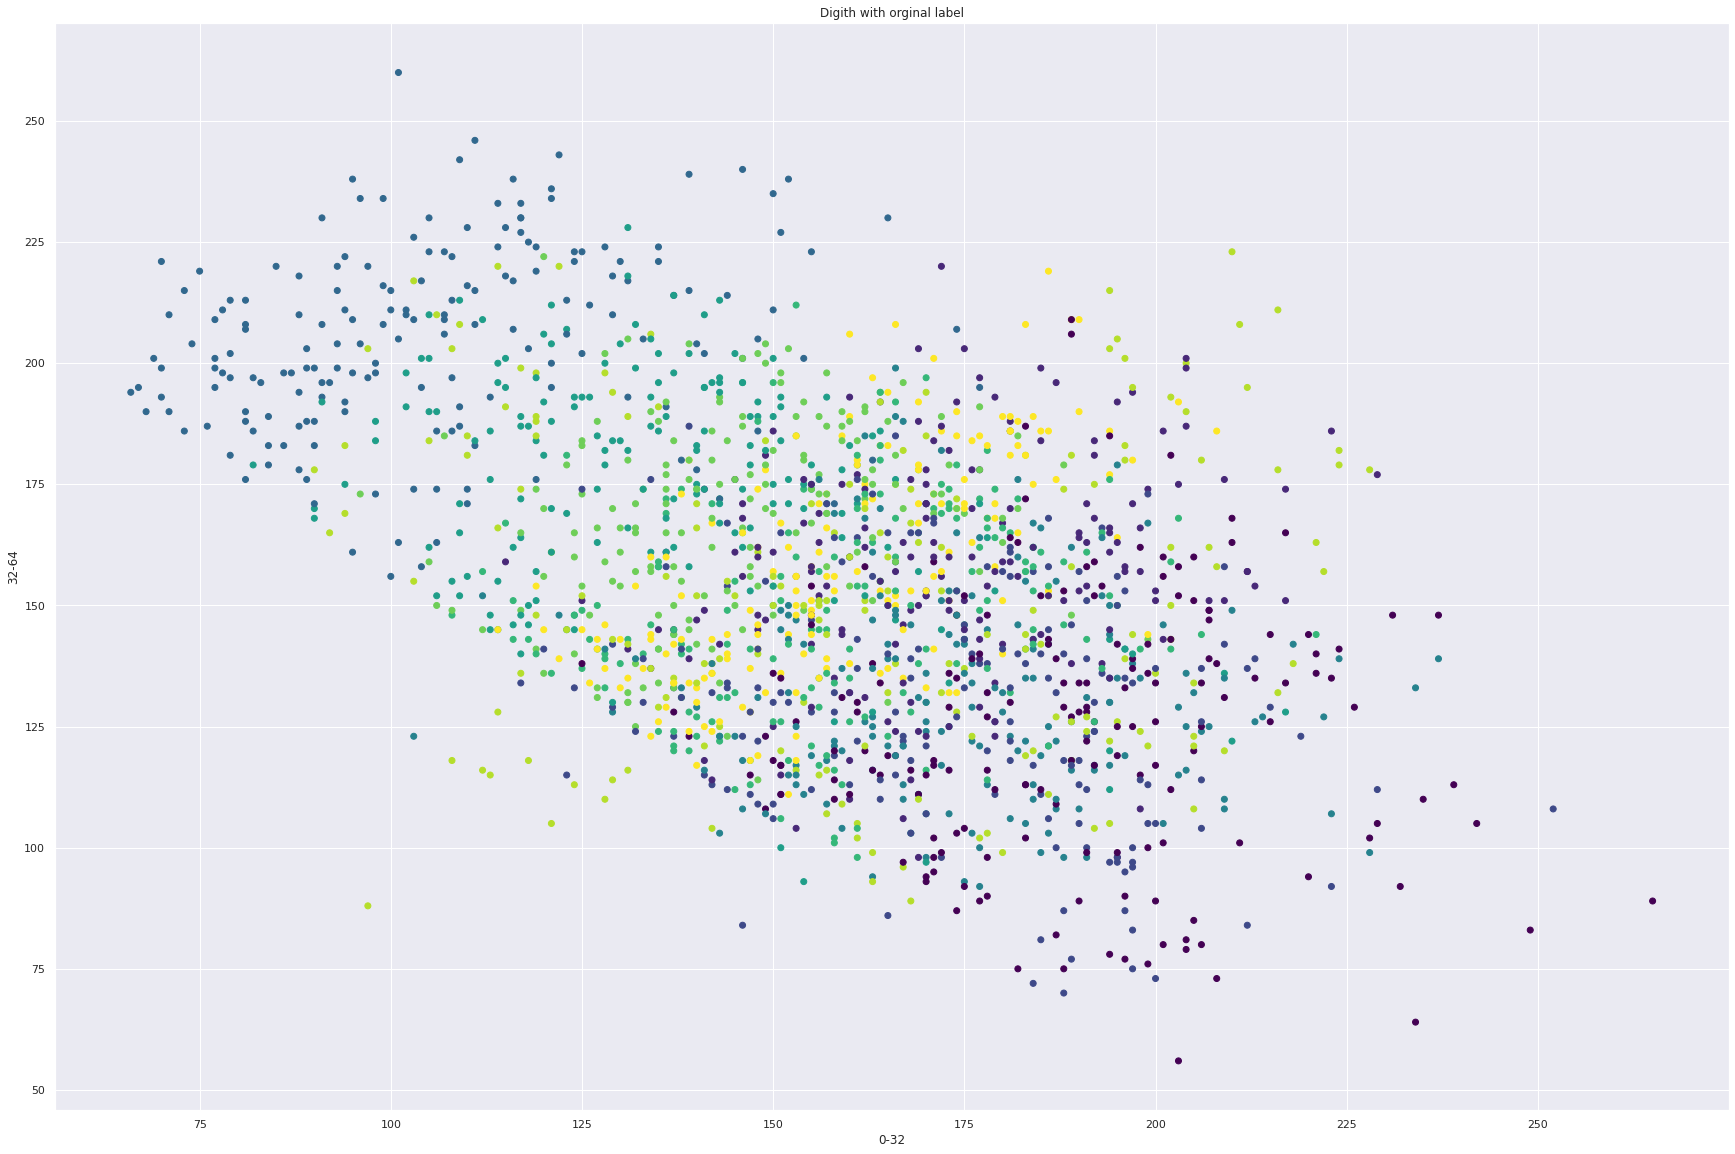

In [302]:
fig,ax = plt.subplots(figsize=(30,20))
ax.set_xlabel("0-32")
ax.set_ylabel("32-64")
ax.set_title("Digith with orginal label")
plt.scatter(x, y, c=data.target, cmap='viridis_r')

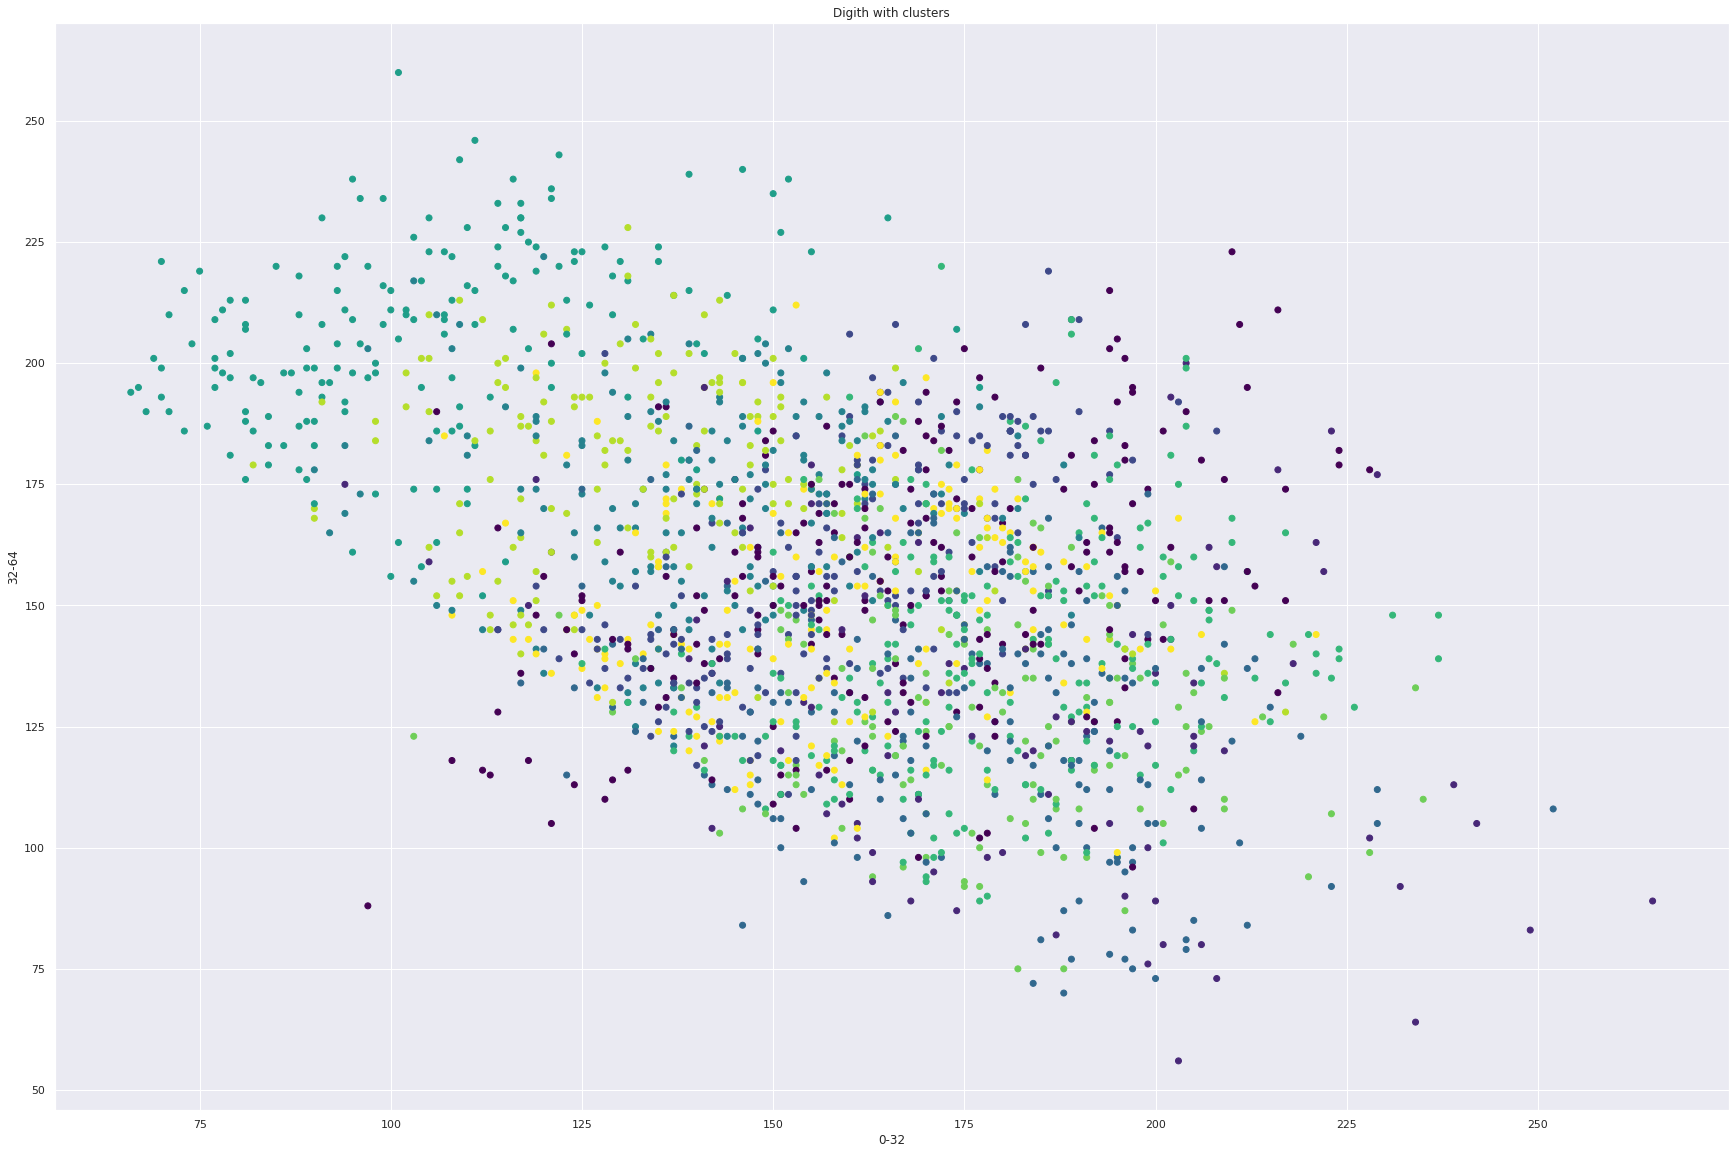

In [303]:
fig,ax = plt.subplots(figsize=(30,20))
ax.set_xlabel("0-32")
ax.set_ylabel("32-64")
ax.set_title("Digith with clusters")
plt.scatter(x, y, c=clusters, cmap='viridis_r')

In [304]:
x1 = []
y1 = []
z1 = []
for q in data.data:
  a = 0
  b = 0
  c = 0
  for i in range(0, 21):
    a = a + q[i]
  for i in range(21, 42):
    b = b + q[i]
  for i in range(42, len(q)):
    c = c + q[i]
  x1.append(a)
  y1.append(b)
  z1.append(c)

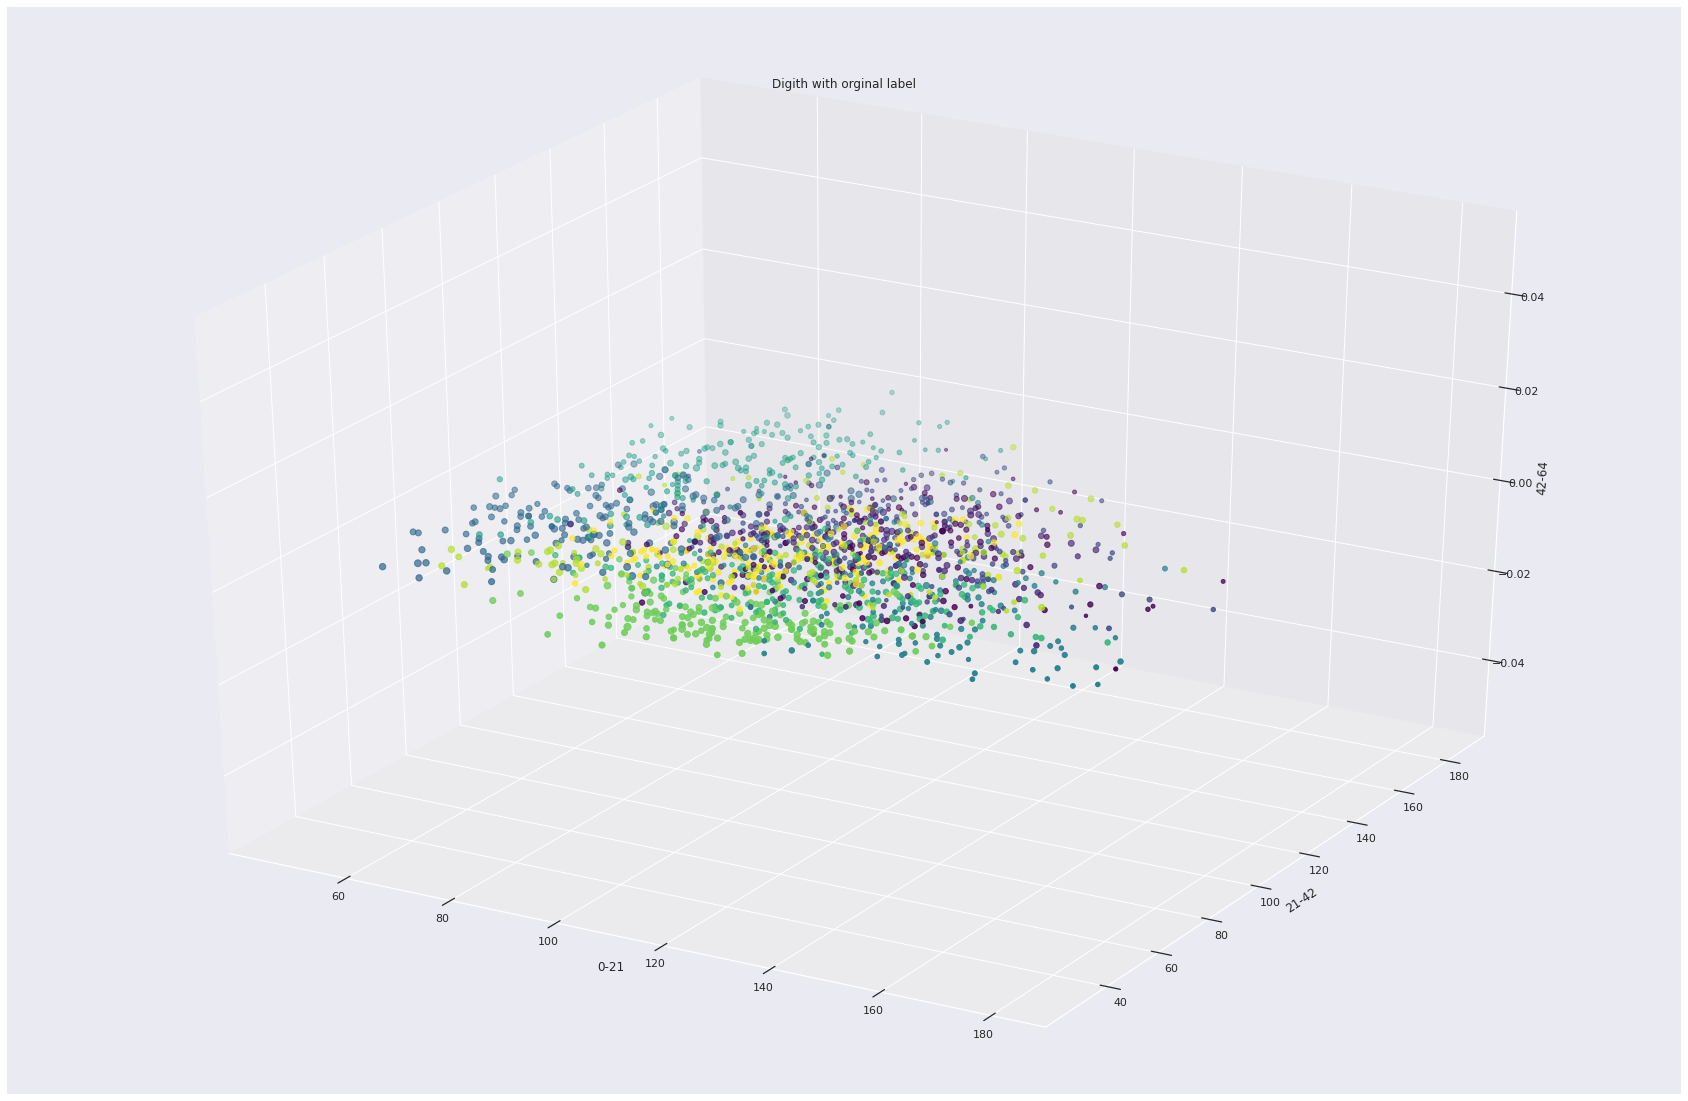

In [305]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("0-21")
ax.set_ylabel("21-42")
ax.set_zlabel("42-64")
ax.set_title("Digith with orginal label")
plt.scatter(x1, y1, z1, c=data.target, marker='.', cmap='viridis_r')

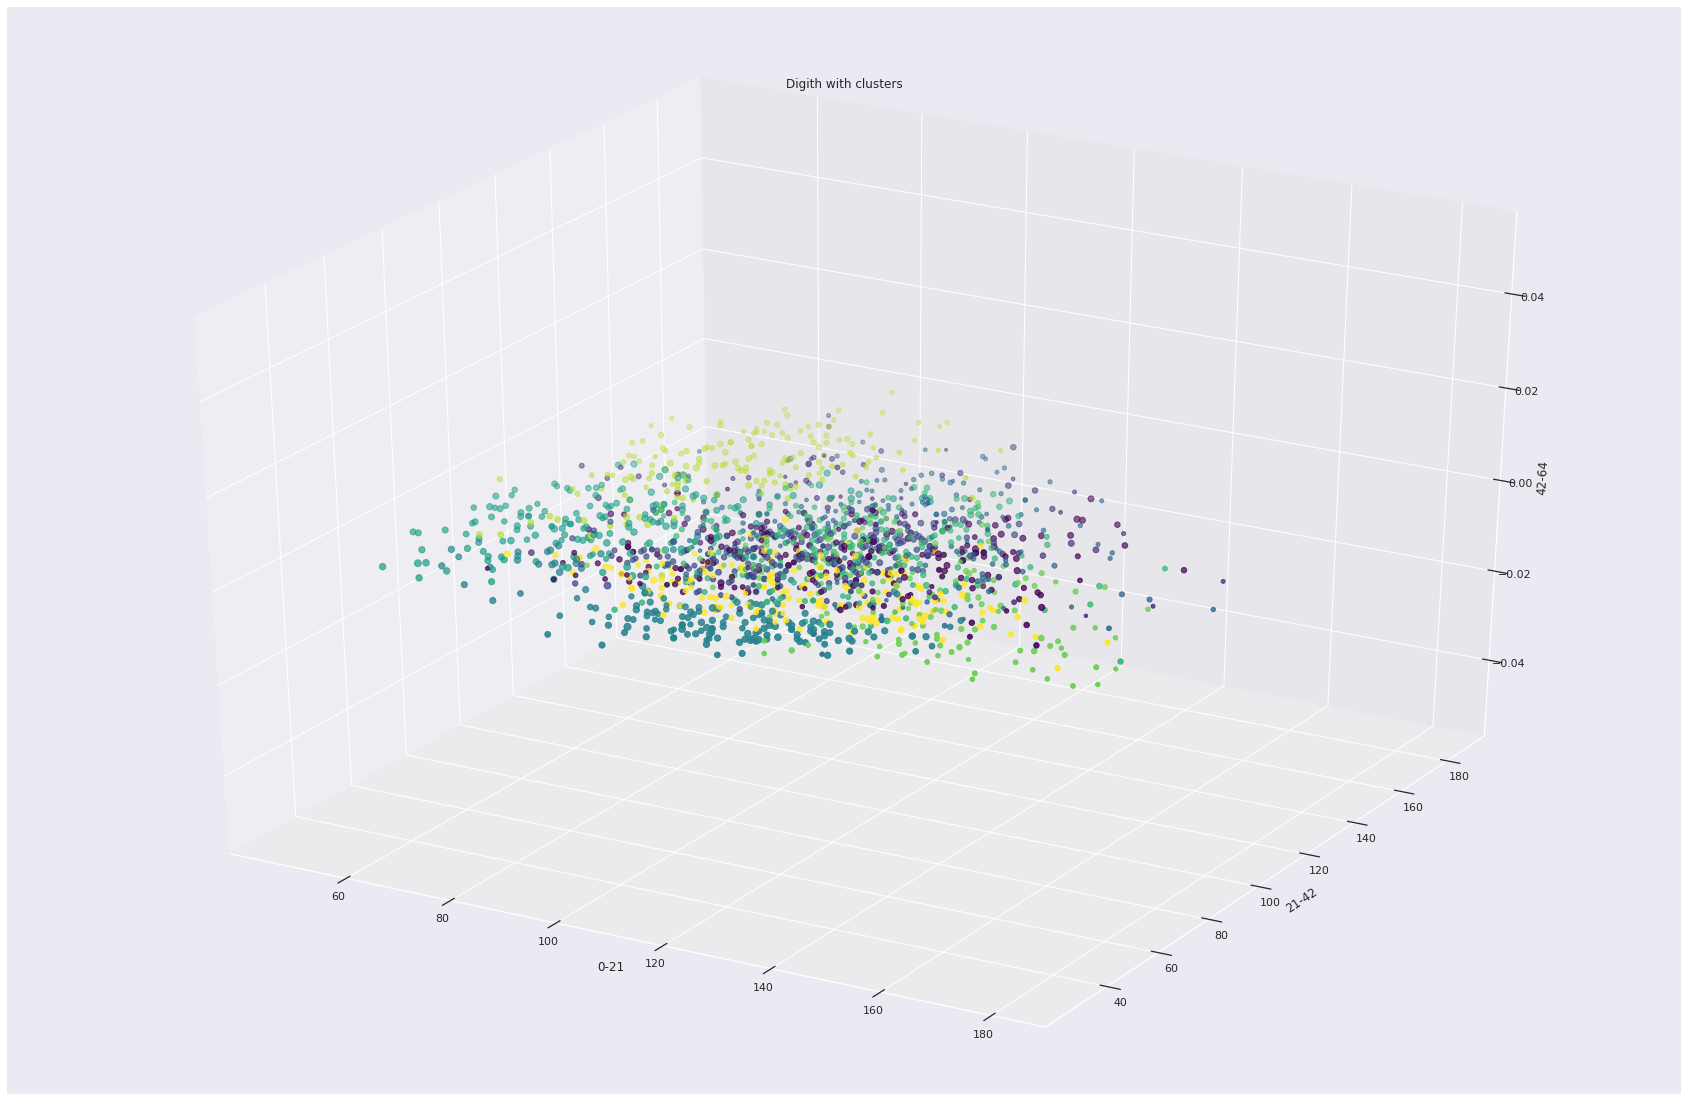

In [306]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("0-21")
ax.set_ylabel("21-42")
ax.set_zlabel("42-64")
ax.set_title("Digith with clusters")
plt.scatter(x1, y1, z1, c=clusters, marker='.', cmap='viridis_r')

# **Dataset: Wine**

In [307]:
data2 = datasets.load_wine()
kmean2 = cluster.KMeans(n_clusters=3, max_iter=200)
clusters2 = kmean2.fit_predict(data2.data)
centers2 = kmean2.cluster_centers_.reshape(3, 13)
print (centers2)

[[1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]
 [1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]]


In [308]:
label = np.zeros_like(clusters2)
for i in range(3):
    mask = (clusters2 == i)
    label[mask] = mode(data2.target[mask])[0]
metrics.accuracy_score(data2.target, label)

0.702247191011236

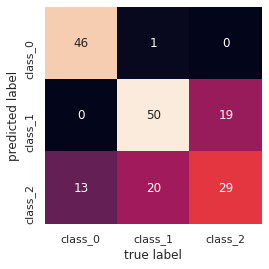

In [309]:
mat = metrics.confusion_matrix(data2.target, label)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data2.target_names,
            yticklabels=data2.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [310]:
x2 = []
y2 = []
for z in data2.data:
  a = 0
  b = 0
  for i in range(0, 7):
    a = a + z[i]
  for i in range(7, len(z)):
    b = b + z[i]
  x2.append(a)
  y2.append(b)

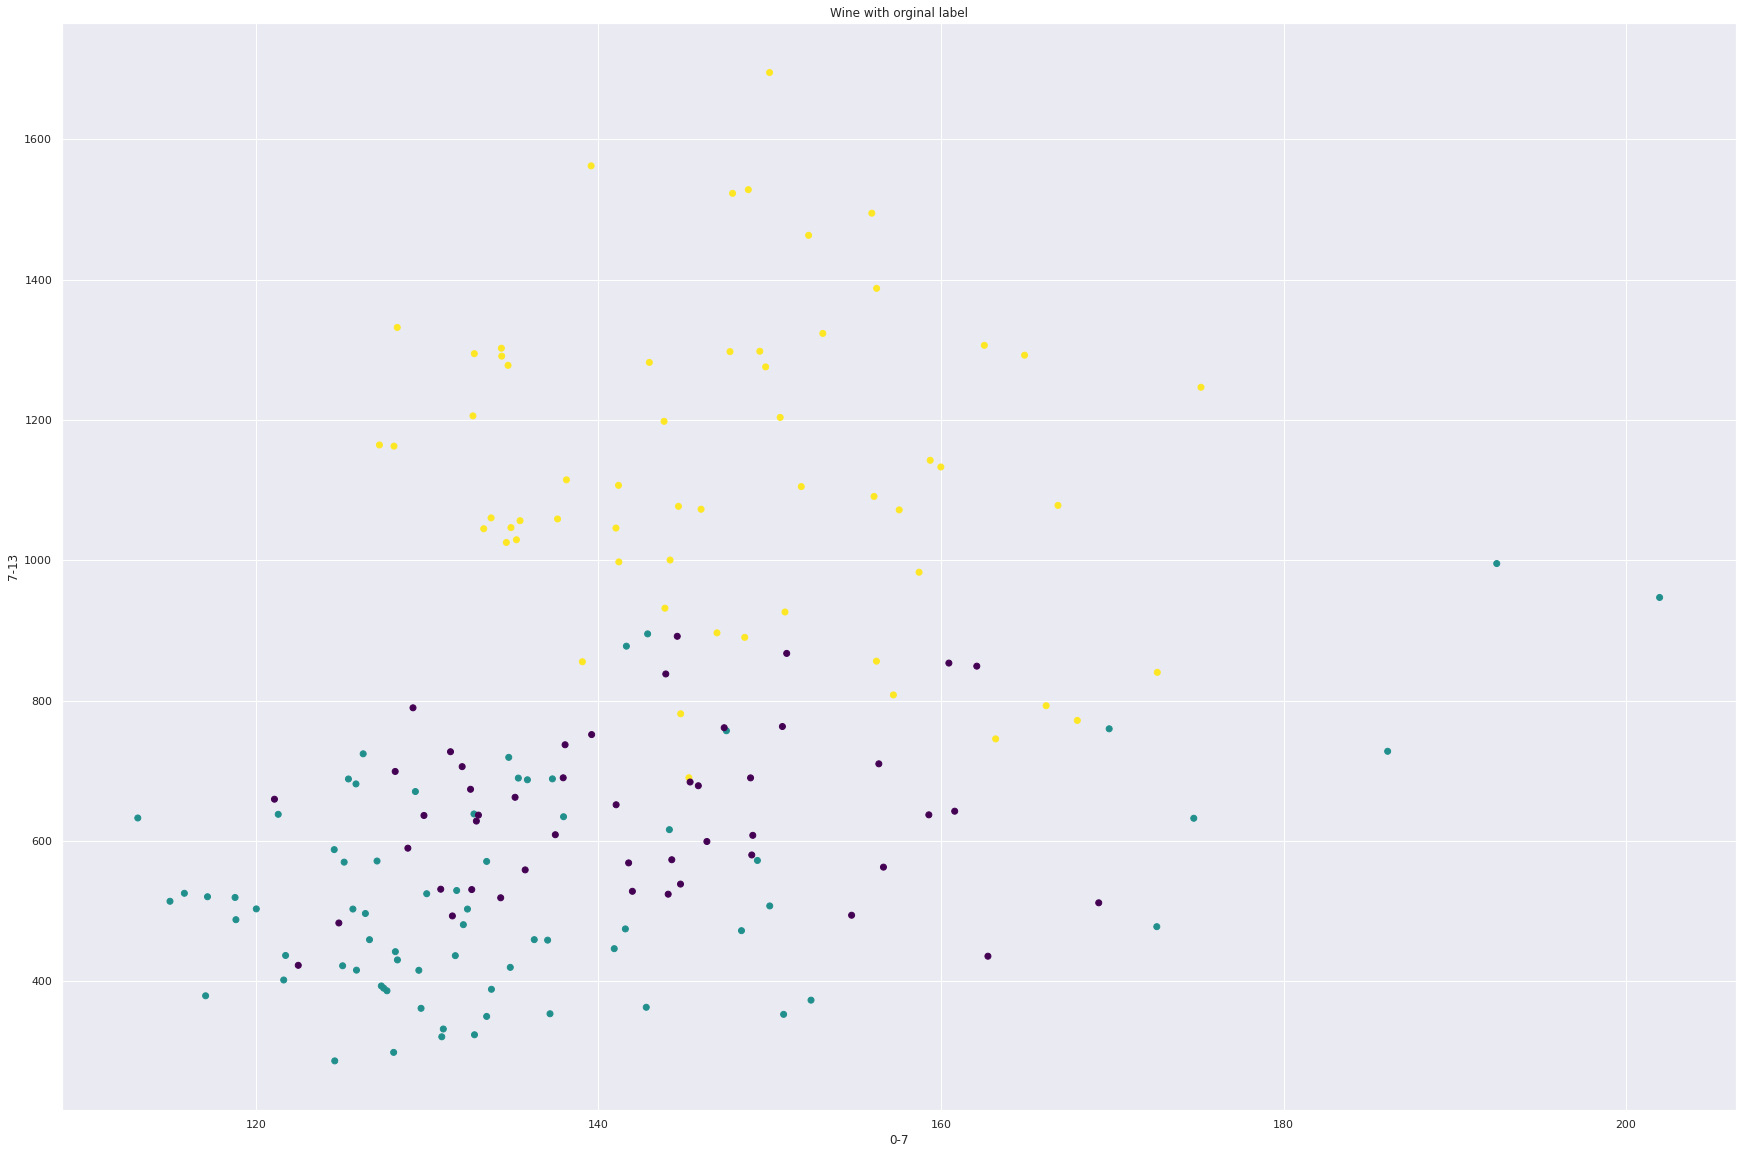

In [311]:
fig,ax = plt.subplots(figsize=(30,20))
ax.set_xlabel("0-7")
ax.set_ylabel("7-13")
ax.set_title("Wine with orginal label")
plt.scatter(x2, y2, c=data2.target, cmap='viridis_r')

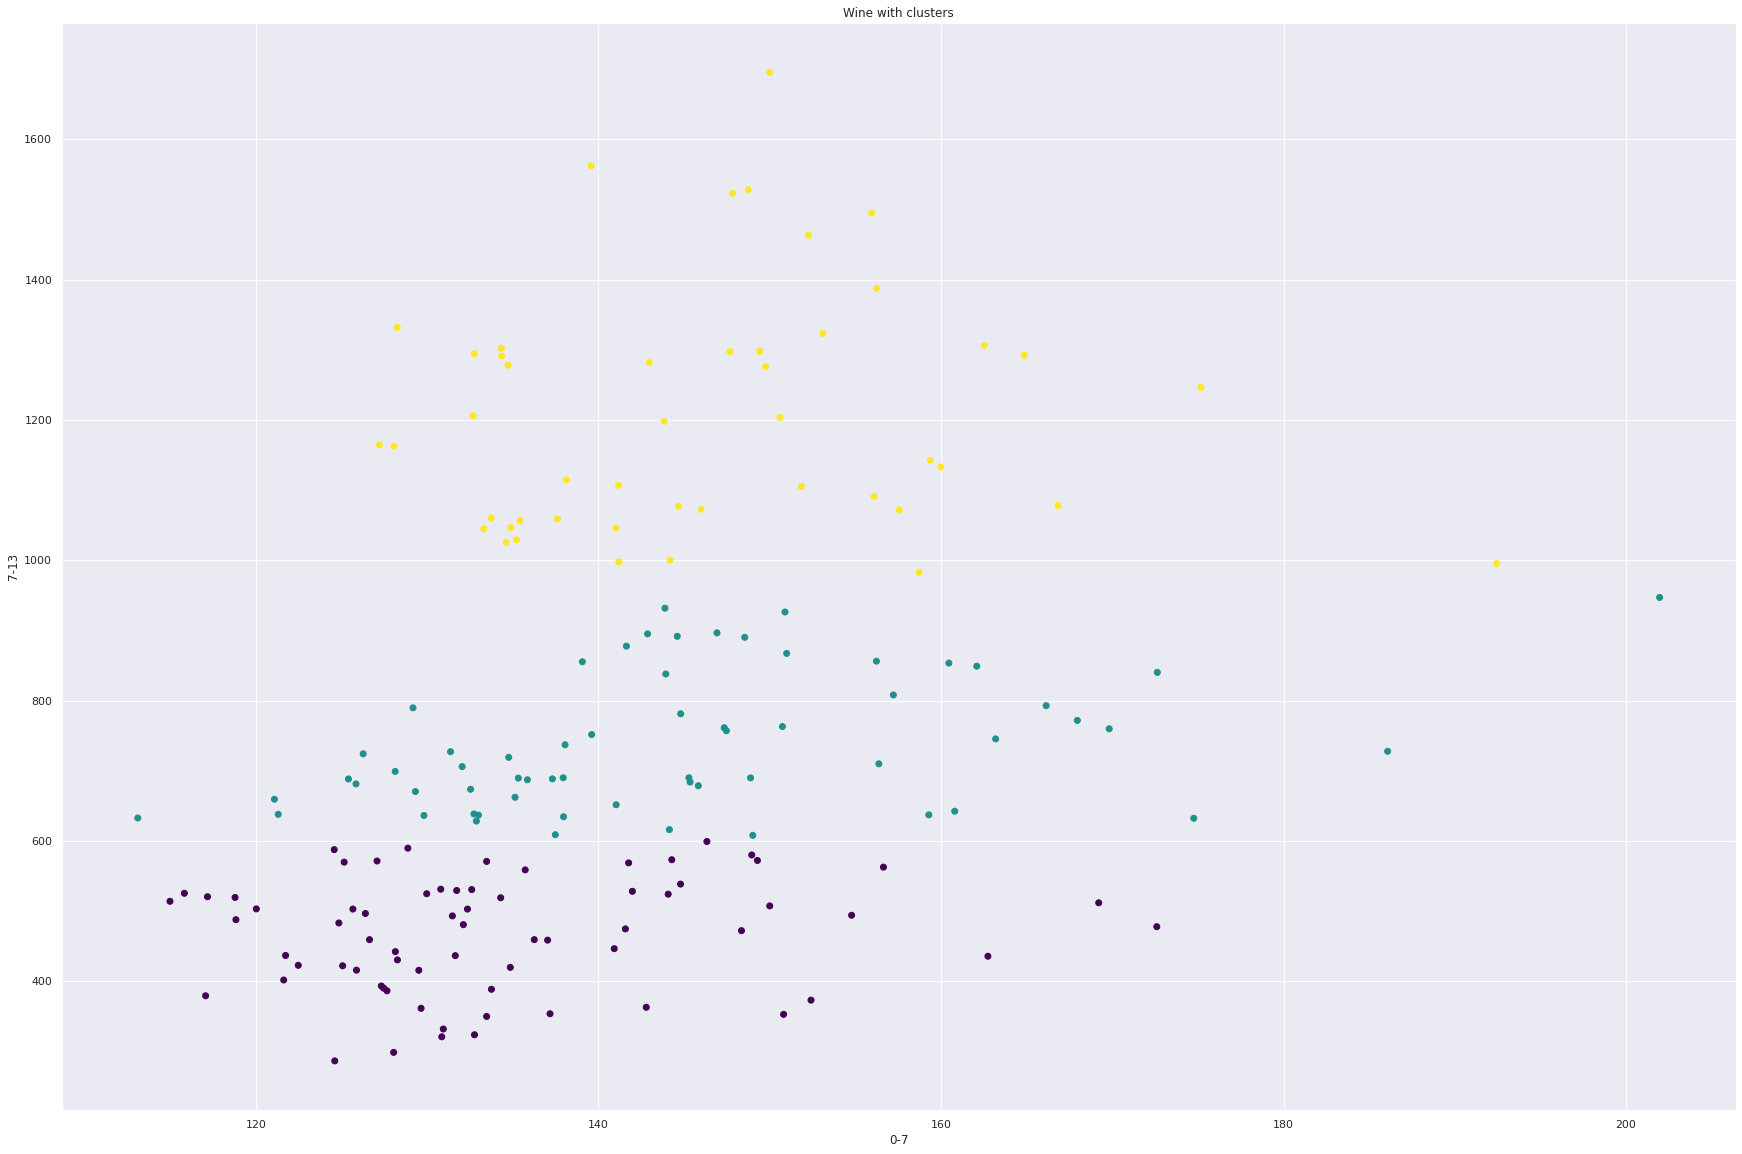

In [312]:
fig,ax = plt.subplots(figsize=(30,20))
ax.set_xlabel("0-7")
ax.set_ylabel("7-13")
ax.set_title("Wine with clusters")
plt.scatter(x2, y2, c=clusters2, cmap='viridis_r')

In [313]:
x3 = []
y3 = []
z3 = []
for q in data2.data:
  a = 0
  b = 0
  c = 0
  for i in range(0, 4):
    a = a + q[i]
  for i in range(4, 8):
    b = b + q[i]
  for i in range(8, len(q)):
    c = c + q[i]
  x3.append(a)
  y3.append(b)
  z3.append(c)

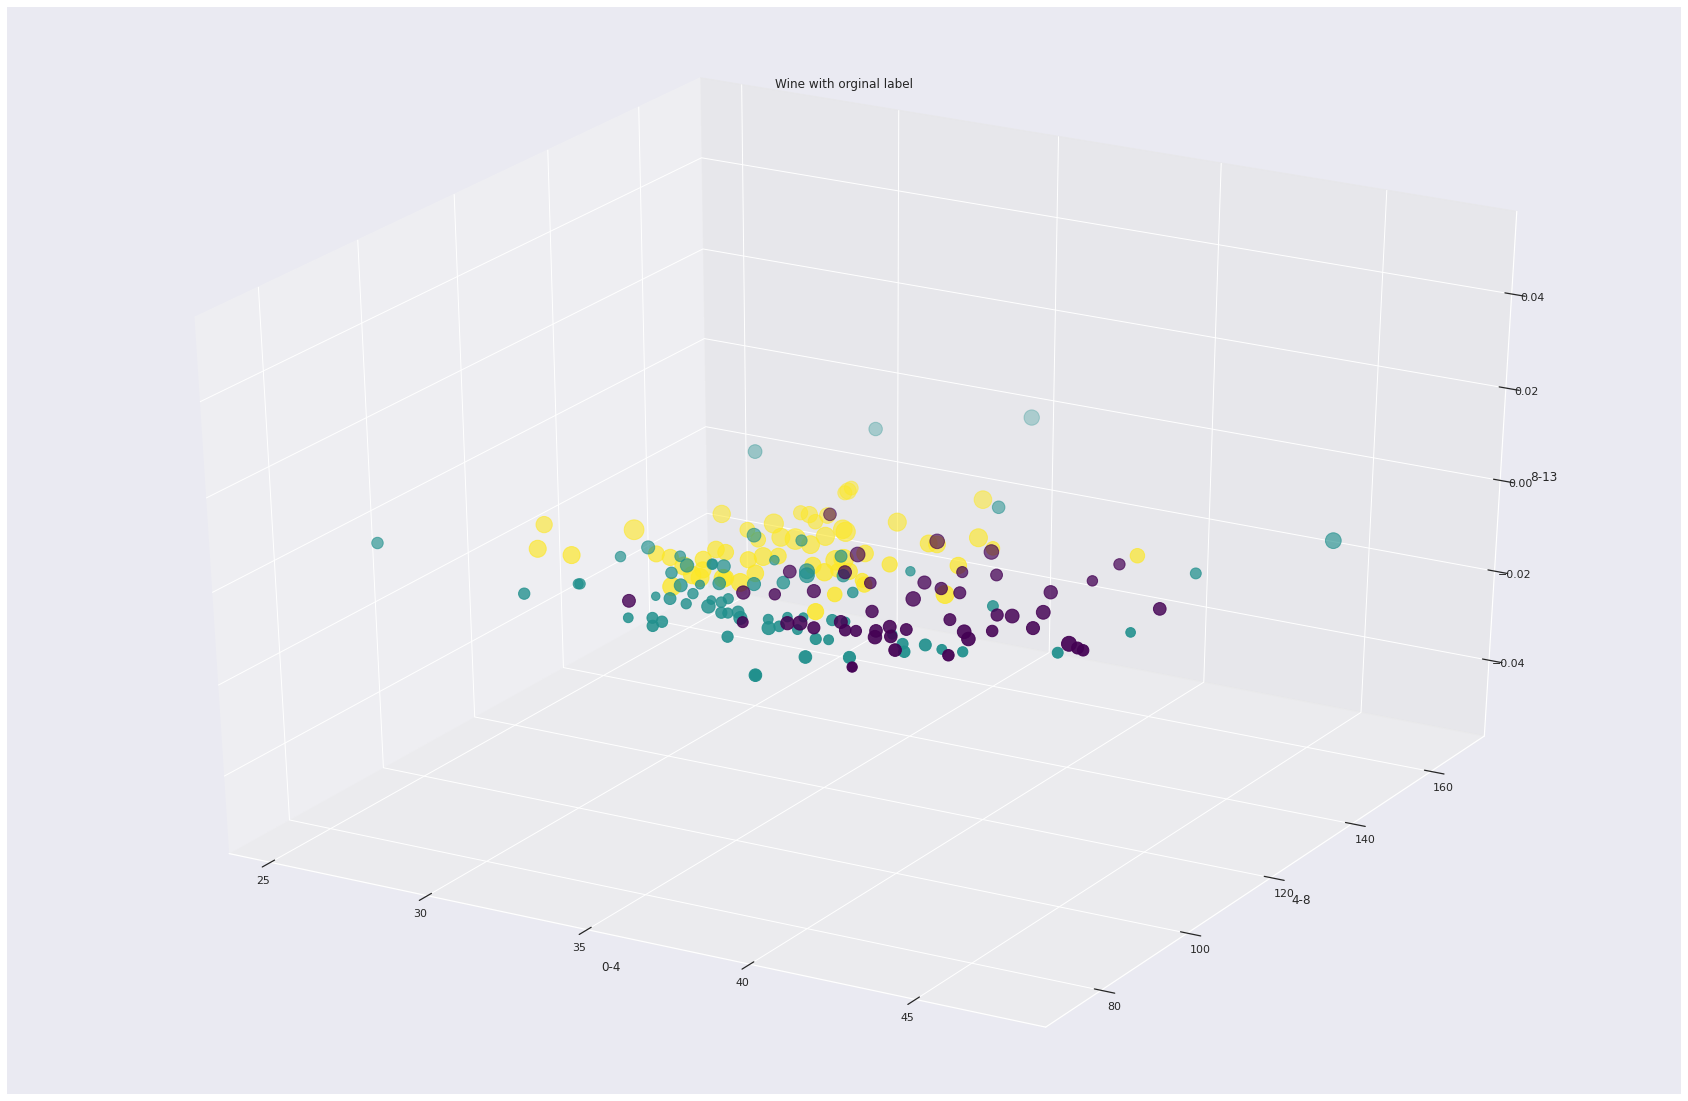

In [314]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("0-4")
ax.set_ylabel("4-8")
ax.set_zlabel("8-13")
ax.set_title("Wine with orginal label")
plt.scatter(x3, y3, z3, c=data2.target, marker='.', cmap='viridis_r')

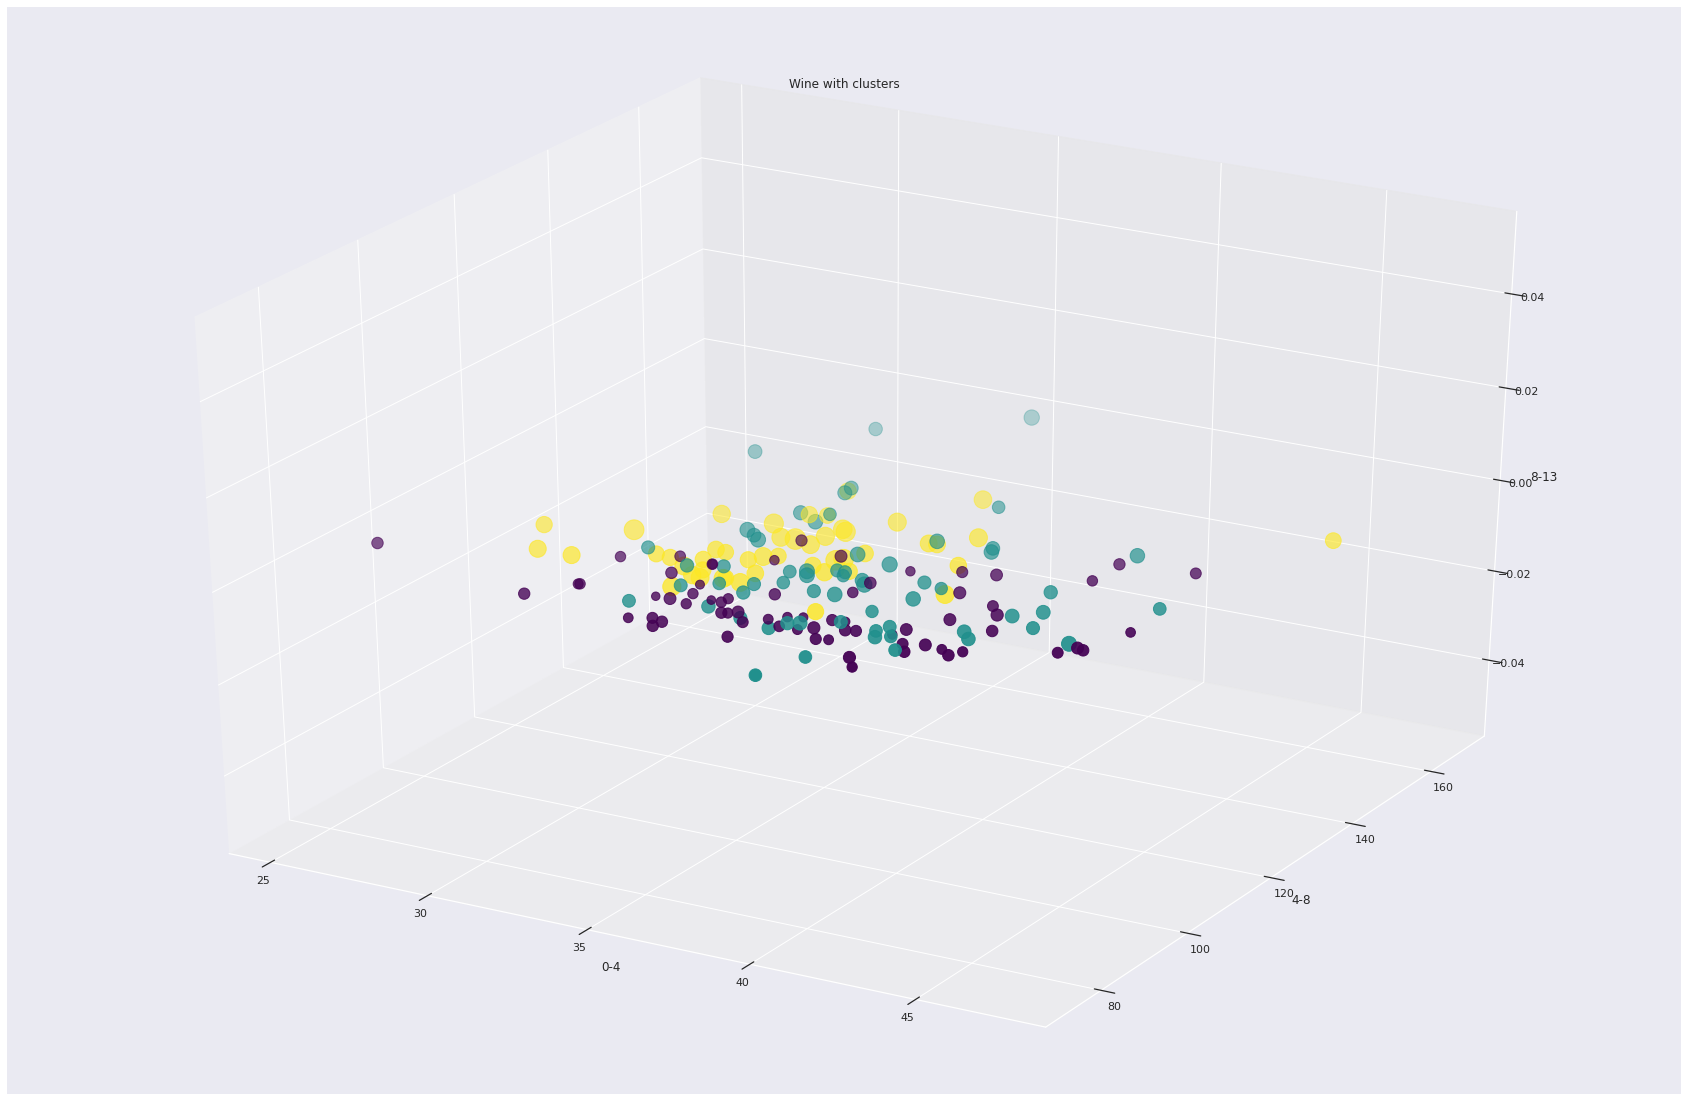

In [315]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("0-4")
ax.set_ylabel("4-8")
ax.set_zlabel("8-13")
ax.set_title("Wine with clusters")
plt.scatter(x3, y3, z3, c=clusters2, marker='.', cmap='viridis_r')